In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def runge_kutta(function, y0: np.ndarray | float, time_space: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    h = time_space[1] - time_space[0]
    num = len(time_space)
    x_a = time_space

    y_a = [y0] * (num)

    for i in range(num - 1):
        k0 = function(x_a[i], y_a[i])
        k1 = function(x_a[i] + h / 2, y_a[i] + h * k0 / 2)
        k2 = function(x_a[i] + h / 2, y_a[i] + h * k1 / 2)
        k3 = function(x_a[i] + h, y_a[i] + h * k2)
        y_a[i + 1] = y_a[i] + h / 6 * (k0 + 2 * k1 + 2 * k2 + k3)

    return x_a, np.array(y_a)

In [ ]:
Q = 100
s = 2

# alpha = np.array([20, 16, 12, 8])
# k = np.append([0], [0.3, 0.2, 0.1])
# m = np.append([0], [4, 3, 2])
# a = np.append([0], [0.3, 0.3, 0.3])

# alpha2 = np.array([16, 12, 8])
# k2 = np.array([0.3, 0.2, 0.1])
# m2 = np.array([4, 3, 2])
# a2 = np.array([0.3, 0.3, 0.3])

_q = 5
_r = 3

alpha = np.array([2] * (_q+1))
k = np.append([0], [0.5] * _q)
m = np.append([0], [0.2] * _q)
a = np.append([0, 0.1], [0] * (_q-1))

alpha2 = np.array([0.1] * _r)
k2 = np.array([0.5] * _r)
m2 = np.array([0.1] * _r)
a2 = np.array([0] * _r)


ab = 0.4
q = len(m) - 1
r = len(m2)

cc = np.append(a*m, a2*m2)
alpha = np.append(alpha, alpha2)
k = np.append(k, k2)
m = np.append(m, m2)
a = np.append(a, a2)

cc[2:] = 0


# g = np.append([0], k[1:] * alpha[:-1] / alpha[1:])
# H = np.append([1], [ np.prod(g[2-(i%2):i+2:2]) for i in range(1, n) ])

# mu =np.append([0], m[1:] / alpha[1:])
# f = np.append([0], [ sum(mu[2-(i%2):i+2:2]/H[2-(i%2):i+2:2]) for i in range(1, n) ])


n = len(alpha)
print(q, r, n)

3 3 7


In [66]:
def get_right_split(func_v, func_1=None):
    func_1 = func_1 or func_v
    def right(t, x):
        return np.array([
            *[Q - alpha[0] * func_1(x[0]) * x[1] + sum(cc * x)],
            *[
                -m[i] * x[i] + k[i] * alpha[i-1] * func_v(x[i-1]) * x[i] - x[i+1] * alpha[i] * func_v(x[i])
                for i in range(1, s)
            ],
            *[
                -m[s] * x[s] + k[s] * alpha[s-1] * func_v(x[s-1]) * x[s] - x[s+1] * alpha[s] * func_v(x[s]) - ab * func_v(x[s]) * x[q+1]
            ],
            *[
                -m[i] * x[i] + k[i] * alpha[i-1] * func_v(x[i-1]) * x[i] - (x[i+1] if i < q-1 else 0 ) * alpha[i] * func_v(x[i])
                for i in range(s+1, q+1)
            ],
            *[
                -m[q+1] * x[q+1] + k[q+1] * ab * func_v(x[s]) * x[q+1] - x[q+2] * alpha[q+1] * func_v(x[q+1])
            ],
            *[
                -m[i] * x[i] + k[i] * alpha[i-1] * func_v(x[i-1]) * x[i] - (x[i+1] if i < r-1 else 0 ) * alpha[i] * func_v(x[i])
                for i in range(q+2, q+r+1)
            ],
        ])
    return right


def identity(x):
    return x

In [70]:
Q = 10
t_s = np.arange(0, 40, 0.001)
N0 = np.array([ 2 ] * (1+q+r))

right_flow = get_right_split(identity)
# right_flow = get_right_flow(np.atan)

Tl, Nl = runge_kutta(right_flow, N0, t_s)

[6.66666667e-01 8.24175824e-01 1.60851549e-12 4.02133085e-35
 2.29378395e-75 1.83770670e-52 9.28576257e-35]
0.06


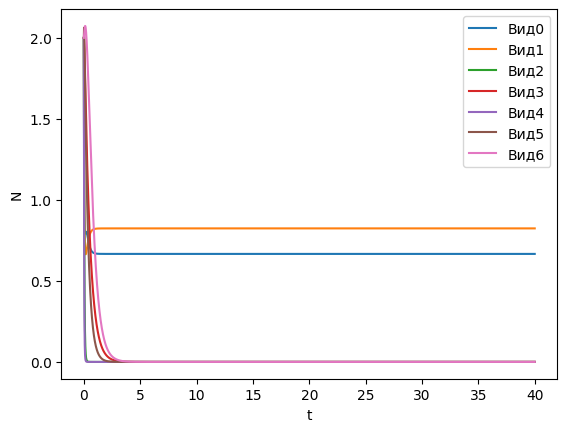

In [71]:
slc_start = 0
slc = -1

start = 0
leg = []

# for i in range(start,n):
#     plt.plot([0, Tl[slc-1]], [NF[i]]*2, "--")
#     leg.append(f"Равн{i}")

for i in range(start,n):
    plt.plot(Tl[slc_start:slc], Nl[slc_start:slc,i])
    leg.append(f"Вид{i}")

plt.legend(
    leg, 
    loc='upper right'
)
plt.xlabel('t')
plt.ylabel('N')

print(Nl[-1])

plt.savefig("./figs/exp3.pdf")
print(cc[1]/alpha[0])